=== Baseline Random Forest ===
Accuracy: 0.7202505219206681

Classification Report:
               precision    recall  f1-score   support

         0.0       0.50      0.19      0.28        21
         1.0       0.55      0.44      0.49        54
         2.0       0.53      0.53      0.53        78
         3.0       0.57      0.48      0.52        83
         4.0       0.85      0.97      0.90       243

    accuracy                           0.72       479
   macro avg       0.60      0.52      0.54       479
weighted avg       0.70      0.72      0.70       479

=== Tuned Random Forest ===
Accuracy: 0.7390396659707724

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      0.10      0.17        21
         1.0       0.62      0.52      0.57        54
         2.0       0.56      0.64      0.60        78
         3.0       0.61      0.46      0.52        83
         4.0       0.84      0.97      0.90       243

    accuracy      

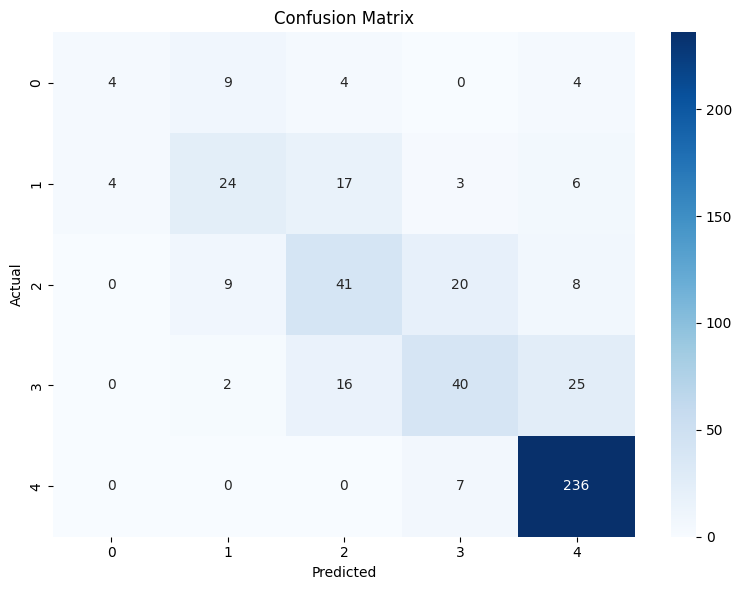

First 20 Predictions:


,Actual,Predicted,Match
0,2.000000,2.000000,True
1,0.000000,0.000000,True
2,4.000000,4.000000,True
3,4.000000,4.000000,True
4,3.000000,2.000000,False
5,4.000000,4.000000,True
6,4.000000,4.000000,True
7,2.000000,2.000000,True
8,3.000000,3.000000,True
9,1.000000,2.000000,False


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

#Step 1: Import CSVs
df = pd.read_csv('..\data\Student_performance_data.csv', delimiter=",")

#Step 2: Separate features and target
X = df.drop(columns=["StudentID", "GradeClass", "GPA"])
y = df['GradeClass']

# Step 3: Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50, stratify=df['GradeClass'])

#Step 4: Train Logistic Regression model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

#Setp 5: predictions
prediction1 = rf.predict(X_test)
rf.score(X_test, y_test)

features = pd.DataFrame(rf.feature_importances_, index = X.columns) #Where does this fit it
#Hyper parameters
rf2 = RandomForestClassifier(n_estimators= 1000, criterion= 'entropy', min_samples_split= 10, max_depth= 14, random_state= 42)

rf2.fit(X_train, y_train)
rf2.score(X_test, y_test)

predictions2 = rf2.predict(X_test)
rf2.score(X_test, y_test)

# Step 7: Evaluation
print("=== Baseline Random Forest ===")
print("Accuracy:", accuracy_score(y_test, prediction1))
print("\nClassification Report:\n", classification_report(y_test, prediction1))

print("=== Tuned Random Forest ===")
print("Accuracy:", accuracy_score(y_test, predictions2))
print("\nClassification Report:\n", classification_report(y_test, predictions2))

#Confusion matrix
con_matrix = confusion_matrix(y_test, predictions2)
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, prediction1), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

#Step 8: Save the model as pkl file in artifacts

with open("../artifacts/randomforest_model.pkl", "wb") as file:
    pickle.dump(rf, file)

#Step 9: Save predictions to CSV
comparison_df = X_test.copy()
comparison_df["Actual_GradeClass"] = y_test.values
comparison_df["Predicted_GradeClass"] = prediction1

#Step 10: Show and save the prediction table

try:
    from IPython.display import display

    # Prepare DataFrame for display
    comparison_df = pd.DataFrame({"Actual": y_test.values,"Predicted": prediction1})
    comparison_df["Match"] = comparison_df["Actual"] == comparison_df["Predicted"]

    def highlight_false_text(row):
        styles = []
        for col in row.index:
            if col == "Match" and row["Match"] == False:
                styles.append("color: red; background-color: black")
            else:
                styles.append("background-color: black; color: white")
        return styles

    print("First 20 Predictions:")
    display(comparison_df.head(20).style.apply(highlight_false_text, axis=1))

except Exception as e:
    print("\n First 20 Predictions:")
    print(comparison_df.head(20).to_string(index=False))

comparison_df.to_csv("../artifacts/randomforest_prediction.csv", index=False)

# Random forest

c:\Users\ferre\OneDrive\Documents\Belgium\MLG382\MLG382_PGroup\MLG382_Guided_Project_GroupX\src\preprocess_data.py:59: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].replace({False: 0.0, True: 1.0})


Model: random_forest
R2 Score: 0.9990
Mean Absolute Error: 0.00
Mean Squared Error: 0.00
random_forest : Train accuracy Score: 0.9999
random_forest : Test accuracy Score: 0.9990
--------------------------------------------------
Saved model to: ../artifacts\random_forest_model.pkl


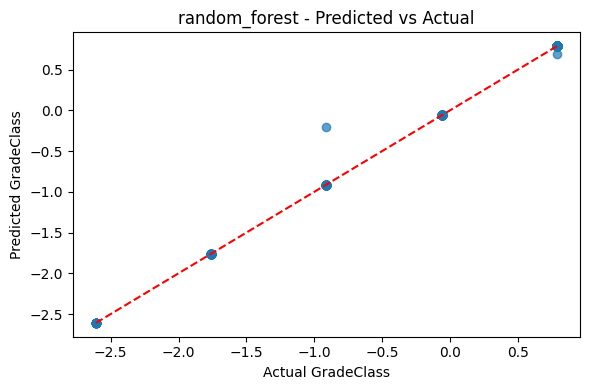

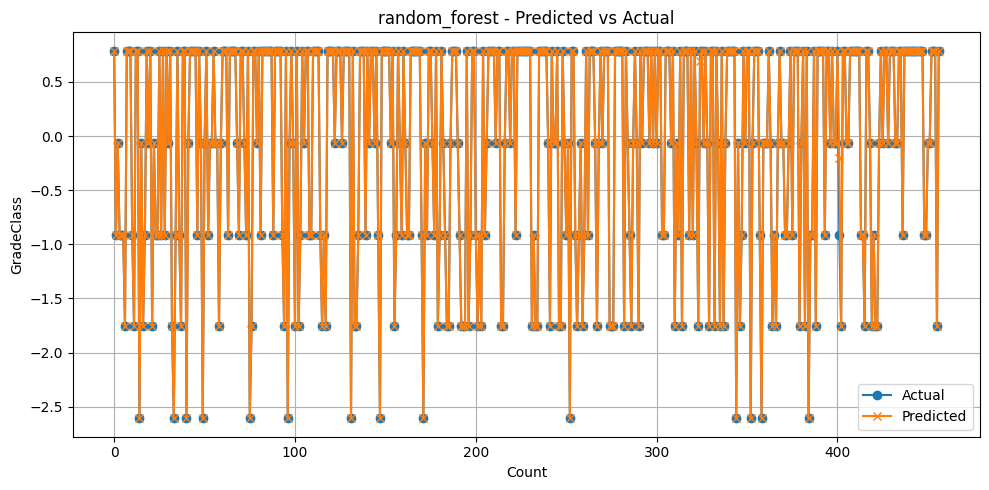

In [2]:
#Importing Required Libraries
import sys
import os

# Import the python libraies from source
#Allows for model to reload without reloading Kernel
import importlib 

#Python files can be used 
sys.path.append(os.path.abspath("../src"))

#prepare_data.py file importing functions
from prepare_data import (
    load_data,
    catagorical_column_transformations,
    feature_engineering
    
)
#preprocess_data.py file importing functions
from preprocess_data import (
    scale_and_encode,
    remove_anomalies,
    get_numeric_columns,
    iterative_outlier_removal,
    make_Onehot
)
#train_models.py file importing functions
from train_models import (
    split_features_target,
    create_train_test_split,
    get_model,
    train_model
)


# Data preparation
# load the data using the load_data function from prepare_data.py
df = load_data('..\data\Student_performance_data.csv')
# decode the catagorical features
df = catagorical_column_transformations(df)
# perform feature engineering using the feature_engineering function from prepare_data.py
df = feature_engineering(df)
# Preprocessing
# scale and encode the data using the scale_and_encode function from preprocess_data.py
df = scale_and_encode(df)
#print(df.columns.to_list())
# remove anomalies using the remove_anomalies function from preprocess_data.py
#   df = remove_anomalies(df) ~ Removing the anaomalies might break the model

# get the numeric columns using the get_numeric_columns function from preprocess_data.py
numeric_columns = get_numeric_columns(df)
# iterative outlier removal using the iterative_outlier_removal function from preprocess_data.py
df = iterative_outlier_removal(df, numeric_columns)
# make the data one-hot
df = make_Onehot(df)
# Model preparation
X, y = split_features_target(df)
# create an train test plit
X_train, X_test, Y_train, Y_test = create_train_test_split(X, y)
# reloading and training the deeplearning model
model=get_model('random_forest')
# model training and evaliation
train_model(model, 'random_forest', X_train, X_test, Y_train, Y_test)